# Step 1
**Reading in images that have a robot in them**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
positiveImages=[]
files=os.listdir("positive")
for i in range(1,len(files)+1):
    img=cv2.imread("positive//1({}).jpg".format(i))
    blurred=cv2.GaussianBlur(img,(7,7),1)
    grayscale=cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
    resize=cv2.resize(threshold,(40,40))
    reshaped=resize.reshape(-1)
    positiveImages.append(reshaped)

# Step 2
**Reading in images that do not have a robot in the picture**

In [3]:
negativeImages=[]
files=os.listdir("negative")
for i in range(1,len(files)+1):
    img=cv2.imread("negative//1({}).jpg".format(i))
    blurred=cv2.GaussianBlur(img,(7,7),1)
    grayscale=cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
    resize=cv2.resize(threshold,(40,40))
    reshaped=resize.reshape(-1)
    negativeImages.append(reshaped)

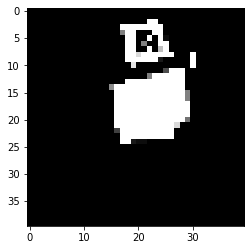

In [4]:
plt.imshow(positiveImages[17].reshape(40,40),cmap="binary")

# Step 3 
**Labelling images**

In [5]:
positive=pd.DataFrame(positiveImages)
positive["y"]=1
negative=pd.DataFrame(negativeImages)
negative["y"]=0
resulting=pd.concat([positive,negative])

# Step 4
**Split data into test and training inputs**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(resulting.drop("y",axis=1),resulting.y,test_size=0.3,random_state=0)

# Step 5
**First trained models**

In [7]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score(prediction,y_test)

0.925

In [8]:
rf = RandomForestClassifier().fit(X_train,y_train)
prediction=rf.predict(X_test)
accuracy_score(prediction,y_test)

0.975

# Step 6

**Detection on video**

In [9]:
cap = cv2.VideoCapture('ar_tag.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    try:
        height,width,dimension=frame.shape
    except:
        break
    blurred=cv2.GaussianBlur(frame,(7,7),3)
    grayscale=cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    ret,threshold = cv2.threshold(grayscale,100,255,cv2.THRESH_BINARY)
    resize=cv2.resize(threshold,(40,40))
    reshaped=resize.reshape(-1)
    step=pd.DataFrame(data=[reshaped])

# Step 7

**Location on image**

**For locating objects on images with OpenCV and machine learning one of the methods actually is to train Haar Classifiers. For this we need images, that do not contain the object and image that contain. We need to show the location, where the object is situated.**